In [1]:
# importing python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

from IPython.display import display

# read the dataset in xlsx format
df = pd.read_excel(r"C:\Users\ainma\Documents\Big Data\Dataset\Student-Employability-Datasets.xlsx")

# Checking for missing data and the general student features in the dataset
display(df.describe(), df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


None

In [2]:
# Checking for NULL values
df.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [3]:
# As seen above, we don't have any missing data and NULL Values.
# The CLASS feature is not included in the describe table because it is a string value

# Let's see the all columns
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [4]:
# As we can see above, from GENERAL APPEARANCE up to Student Performance Rating has Categorical Value from 1-5
# Same as well with the CLASS column but instead of numerical value, it uses string value: Employable/LessEmployable

# let's change CLASS into Employability for more clarity
# and assign 0 - Less Employable, 1 - Employable
df['Employability'] = df['CLASS'].apply(lambda x: 1 if x=='Employable' else 0)
df.drop(['CLASS','Name of Student'], axis=1, inplace=True)
df.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,Employability
0,4,5,4,5,5,5,5,5,1
1,4,4,4,4,4,4,3,5,1
2,4,3,3,3,3,3,2,5,0
3,3,3,3,2,3,3,3,5,0
4,4,4,3,3,4,4,3,5,1


This is the headers: [0, 1]
This is the count: [1253, 1729]


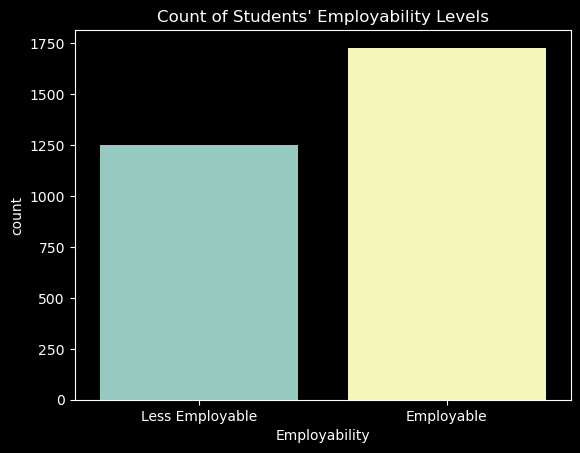

In [5]:
# Let's see the number of students for each CLASS (Less Employable, Employable)
mpl.style.use('dark_background')

counts = [g.shape[0] for _, g in df.groupby('Employability')]
headers = [g.iloc[0, -1] for _, g in df.groupby('Employability')]
print(f"This is the headers: {headers}\nThis is the count: {counts}")

sns.countplot(x='Employability', data=df)
plt.xticks(ticks=[0, 1], labels=['Less Employable', 'Employable'])
plt.title("Count of Students' Employability Levels")

plt.savefig("[1] Count of Students' Employability Levels", bbox_inches='tight', dpi=300)
plt.show()

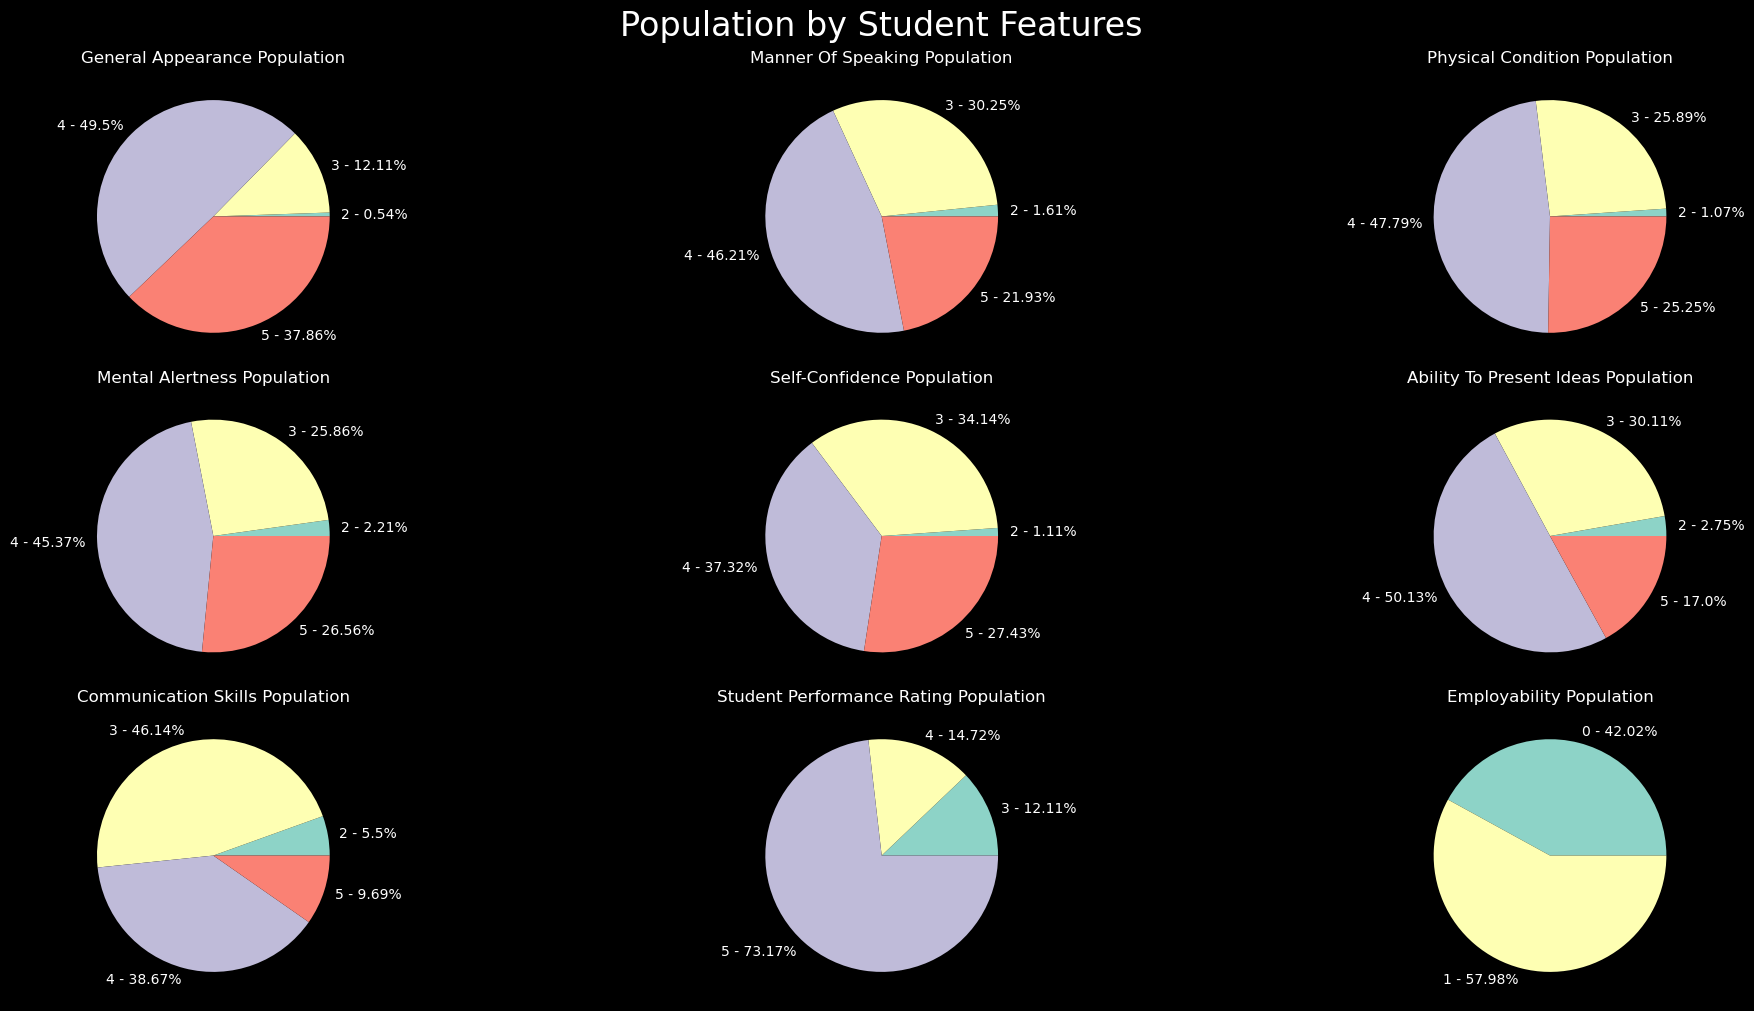

In [6]:
# Piechart Variables
def pie_chart_var(col_name, df):
    counts = [g.shape[0] for _,g in  df.groupby(col_name)]
    headers = [g.loc[:,col_name].iloc[0] for _,g in  df.groupby(col_name)]

    #get the percentage
    percentages = np.array(counts) / np.array(counts).sum() *100
    headers = [f"{label} - {round(percentage,2)}%" for label, percentage in zip(headers, percentages)]
    
    return counts, headers


# Generate the Pie Charts
col = 3
row = math.ceil(len(df.columns)/col)
fig,ax = plt.subplots(row,col, figsize=(20,10), layout='constrained')

for idx, ax in enumerate(ax.flatten()):
    if idx < len(df.columns):
        col_name = list(df.columns)[idx]
        counts, headers = pie_chart_var(col_name, df)
        ax.pie(counts, labels=headers)
        ax.set_title(f"{col_name.title()} Population")
    else:
        ax.remove()

fig.suptitle("Population by Student Features", fontsize=24)
plt.savefig("[2] Population by Student Features.png", bbox_inches='tight', dpi=300)
plt.show()

In [7]:
# Let's check the correlation of the values to each other.
print(f'SKEWNESS:\n{df.skew()}\
    \n\nKURTOSIS\n{df.kurtosis()}')

SKEWNESS:
GENERAL APPEARANCE           -0.452415
MANNER OF SPEAKING           -0.028022
PHYSICAL CONDITION           -0.111690
MENTAL ALERTNESS             -0.212908
SELF-CONFIDENCE               0.037227
ABILITY TO PRESENT IDEAS     -0.097850
COMMUNICATION SKILLS          0.218410
Student Performance Rating   -1.493381
Employability                -0.323558
dtype: float64    

KURTOSIS
GENERAL APPEARANCE           -0.387747
MANNER OF SPEAKING           -0.781600
PHYSICAL CONDITION           -0.795129
MENTAL ALERTNESS             -0.702947
SELF-CONFIDENCE              -1.192080
ABILITY TO PRESENT IDEAS     -0.430955
COMMUNICATION SKILLS         -0.349087
Student Performance Rating    0.703179
Employability                -1.896583
dtype: float64


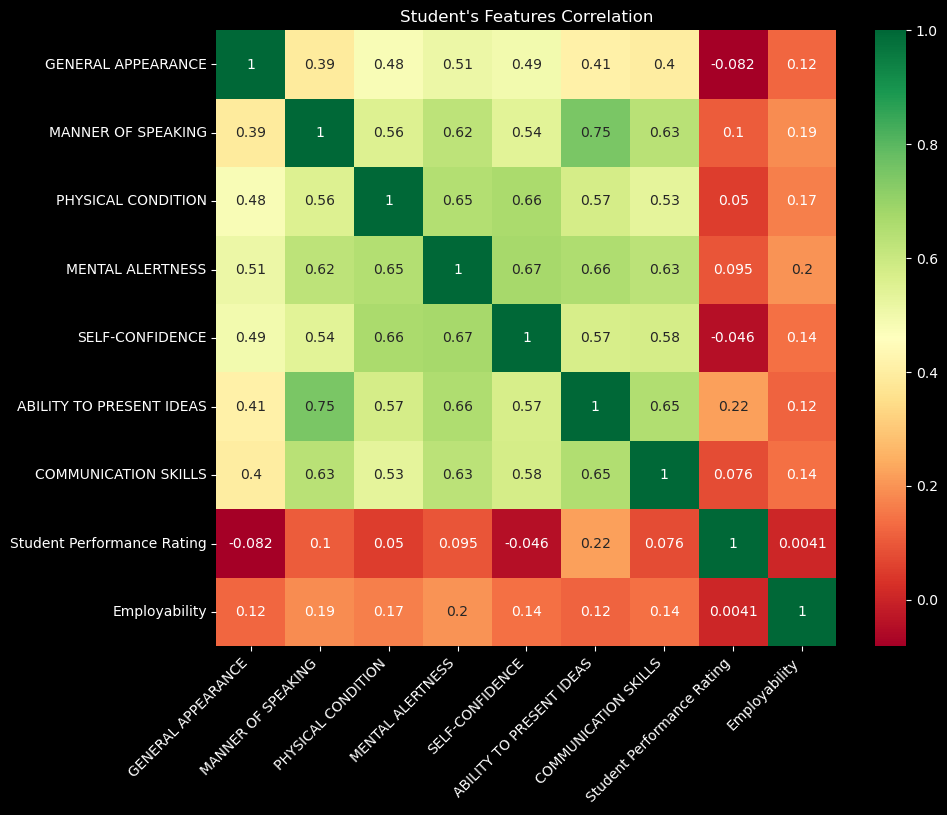

In [8]:
# As we can see from above, the data are mostly NEGATIVELY SKEWED.
# Negatively skewed means it does not follow the normal distribution

# Thus, we will use the Spearman's Correlation
spearmanCorr = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(spearmanCorr, annot=True, cmap='RdYlGn')
plt.title("Student's Features Correlation")
plt.xticks(rotation=45, ha='right')
plt.savefig("[3] Student's Features Correlation.png", bbox_inches='tight', dpi=300)
plt.show()

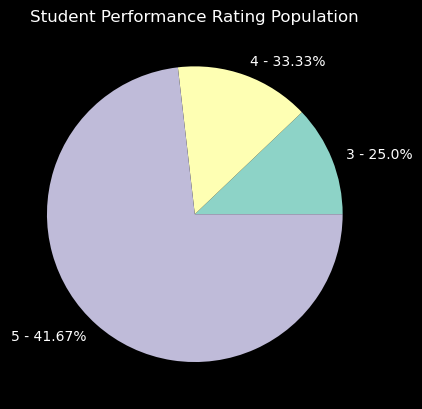

In [9]:
# As seen in the Correlation Graph, 
# there is a low correlation across all student features for Student Performance except for Ability to Present Ideas
def pie_chart(col_name, df):
    counts = [g.shape[0] for _, g in df.groupby(col_name)]
    headers = [g.loc[:, col_name].iloc[0] for _, g in df.groupby(col_name)]

    # Get percentages
    percentages = np.array(headers) / np.array(headers).sum() * 100
    headers = [f"{label} - {round(percentage, 2)}%" for label, percentage in zip(headers, percentages)]

    plt.pie(counts, labels=headers)
    plt.title(f"{col_name} Population")
    
    # Save the pie chart
    plt.savefig("[4] Student Performance Rating.png", bbox_inches='tight', dpi=300)
    
    # Display the pie chart
    plt.show()

# Call the function to create and save the pie chart
pie_chart("Student Performance Rating", df)


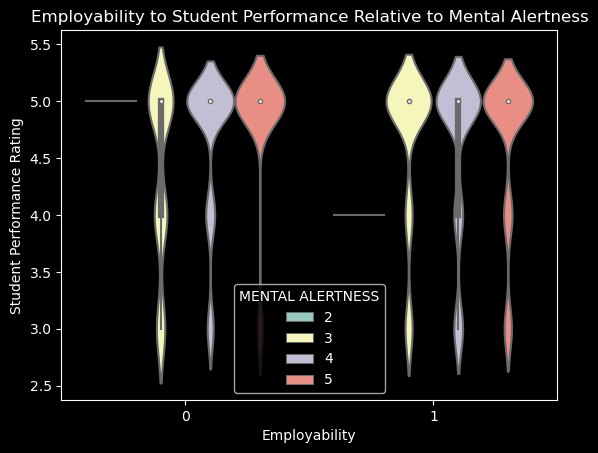

In [10]:
# Using Mental Alertness as hue because it has the highest correlation with Employability
# Employability to Student Performance relative to Mental Alertness
ax = sns.violinplot(df, x="Employability", y="Student Performance Rating", hue="MENTAL ALERTNESS")
ax.set_title("Employability to Student Performance Relative to Mental Alertness")
plt.savefig("[5] Employability to Student Performance Relative to Mental Alertness.png", bbox_inches='tight', dpi=300)
plt.show()

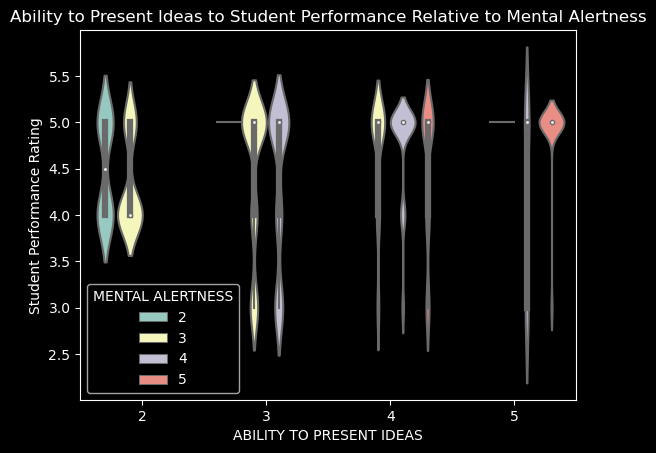

In [11]:
# Employability to Student Performance relative to Mental Alertness
ax = sns.violinplot(df, y="Student Performance Rating", x="ABILITY TO PRESENT IDEAS", hue="MENTAL ALERTNESS")
ax.set_title("Ability to Present Ideas to Student Performance Relative to Mental Alertness")
plt.savefig("[6] Ability to Present Ideas to Student Performance Relative to Mental Alertness.png", bbox_inches='tight', dpi=300)
plt.show()

In [12]:
# We will use Interquartile Range Test to determine if there are outliers in the data
def iqr_test(col_name, df):
    df = df.copy()
    
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)

    iqr = q3-q1
    print(iqr)
    
    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr
    print(upper_limit,lower_limit)
    
    iqr_df = df.loc[(df[col_name]<lower_limit)|(df[col_name]>upper_limit)]
    
    return iqr_df[[col_name]]

iqr_df = iqr_test('Student Performance Rating', df)
print("IQR Test")
display(iqr_df)

print("\n\nEmployability Correlation\n")
display(spearmanCorr['Employability'].sort_values(ascending=False))

1.0
6.5 2.5
IQR Test


,Student Performance Rating




Employability Correlation



Employability                 1.000000
MENTAL ALERTNESS              0.198860
MANNER OF SPEAKING            0.187373
PHYSICAL CONDITION            0.166728
SELF-CONFIDENCE               0.139421
COMMUNICATION SKILLS          0.139287
GENERAL APPEARANCE            0.121237
ABILITY TO PRESENT IDEAS      0.118289
Student Performance Rating    0.004146
Name: Employability, dtype: float64

GENERAL APPEARANCE is correlated to the student's: MENTAL ALERTNESS, SELF-CONFIDENCE, PHYSICAL CONDITION
MANNER OF SPEAKING is correlated to the student's: ABILITY TO PRESENT IDEAS, COMMUNICATION SKILLS, MENTAL ALERTNESS
PHYSICAL CONDITION is correlated to the student's: SELF-CONFIDENCE, MENTAL ALERTNESS, ABILITY TO PRESENT IDEAS
MENTAL ALERTNESS is correlated to the student's: SELF-CONFIDENCE, ABILITY TO PRESENT IDEAS, PHYSICAL CONDITION
SELF-CONFIDENCE is correlated to the student's: MENTAL ALERTNESS, PHYSICAL CONDITION, COMMUNICATION SKILLS
ABILITY TO PRESENT IDEAS is correlated to the student's: MANNER OF SPEAKING, MENTAL ALERTNESS, COMMUNICATION SKILLS
COMMUNICATION SKILLS is correlated to the student's: ABILITY TO PRESENT IDEAS, MANNER OF SPEAKING, MENTAL ALERTNESS
Student Performance Rating is correlated to the student's: ABILITY TO PRESENT IDEAS, MANNER OF SPEAKING, MENTAL ALERTNESS
Employability is correlated to the student's: MENTAL ALERTNESS, MANNER OF SPEAKING, PHYSICAL CON

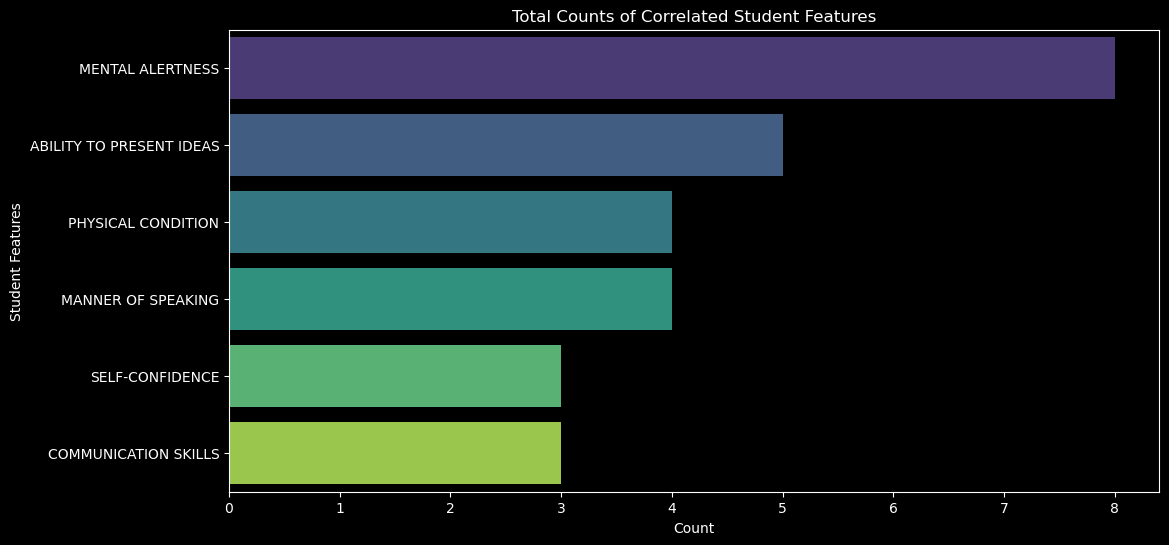

In [13]:
# From the data we gathered above, we can say that it is biased towards student who have high-performance rating.
# Also, we can see that there are no outliers in our data.

# At this time, we can infer from the correlation that there is no correlation between academic employability and performance

# Let's check which student features correlate to each other the most
correlation_by_three = []
correlated_items_count = {}

for col in spearmanCorr.columns:
    correlation = spearmanCorr[col].sort_values(ascending=False).index[0:4]
    correlation_by_three.append(correlation)
    for item in correlation[1:]:
        if item in correlated_items_count:
            correlated_items_count[item] += 1
        else:
            correlated_items_count[item] = 1

for cor in correlation_by_three:
    correlated_items = ', '.join(cor[1:])
    print(f"{cor[0]} is correlated to the student's: {correlated_items}")

print("\nTotal counts of student features:")
for item, count in correlated_items_count.items():
    print(f"{item}: {count}")

# Create a DataFrame for the counts
counts_df = pd.DataFrame({"Student Features": list(correlated_items_count.keys()), "Count": list(correlated_items_count.values())})

# Sort the DataFrame by count in descending order
counts_df = counts_df.sort_values(by="Count", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Count", y="Student Features", data=counts_df, palette="viridis")
plt.title("Total Counts of Correlated Student Features")

# x-axis and y-axis labels
plt.xlabel("Count")
plt.ylabel("Student Features")

plt.savefig("[7] Total Counts of Correlated Student Features.png", bbox_inches='tight', dpi=300)
plt.show()

In [14]:
# As we can see, MENTAL ALERTNESS is the most common correlation
# Also, it has appeared in all 8 student features
# And, MENTAL ALERTNESS is the top correlated value for GENERAL APPEARANCE, SELF-CONFIDENCE, and Numerical Employability

# It can be inferred that possessing strong mental alertness is a valuable attribute 
# that positively influences one's performance in various aspects, particularly employability.